In [2]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from util import computeFeatureImportance
from sklearn.tree import DecisionTreeClassifier

np.random.seed(42)

In [3]:
n_clusters = 4
train_size = 0.8

In [4]:
# ------ Data import ------ #

print("Importing data...")
x = pd.read_csv(r'Data Gathering and Preprocessing/features_Walking_scaled.csv')
print("Data imported")
print(f"Shape of data: {x.shape}")

# ------ train, test split ------ #

print("Splitting data into train and test...")
train, test = train_test_split(x, train_size=train_size)

Importing data...
Data imported
Shape of data: (3290, 27)
Splitting data into train and test...


In [5]:
# ------ x, y split ------ #

print("Splitting data into x and y...")
le = LabelEncoder()
le.fit(train["label"])
print(f"Classes: {le.classes_}")

y_train = le.transform(train["label"])
x_train = train.copy()
x_train = x_train.drop(["label", "time", "ID"], axis=1)

y_test = le.transform(test["label"])
x_test = test.copy()
x_test = x_test.drop(["label", "time", "ID"], axis=1)

Splitting data into x and y...
Classes: ['running' 'stairs_down' 'stairs_up' 'walking']


In [6]:

print("starting kmeans...")
# ------ PCA ------ #

print("Using PCA...")
pca = PCA(2)
df = pca.fit_transform(x_train)
df_test = pca.fit_transform(x_test)

x_train_pca = np.array(df)
x_test_pca = np.array(df_test)

# ------ Training KMeans ------ #

print("Training KMeans...")
model = KMeans(n_clusters=n_clusters)
model.fit(x_train)
label = model.labels_
# print(label)

pred_y = model.predict(x_test)
print(f"KMeans accuracy: {accuracy_score(y_test, pred_y)}")

model = KMeans(n_clusters=n_clusters)
model.fit(df)
label = model.labels_

# ------ centroid ------ #

print("Calculating centroids...")
centroids = model.cluster_centers_
u_labels = np.unique(label)

cdict = {0: 'red', 1: 'blue', 2: 'green', 3: 'yellow', 4: 'brown', 5: 'purple', 6: 'orange', 7: 'pink'}
ldict = {}
for i in range(len(u_labels)):
    ldict[i] = le.classes_[i]
    
print("predicting...")
pred = model.predict(df_test)
print("Done")

starting kmeans...
Using PCA...
Training KMeans...
KMeans accuracy: 0.04559270516717325
Calculating centroids...
predicting...
Done


Plotting model and test data...


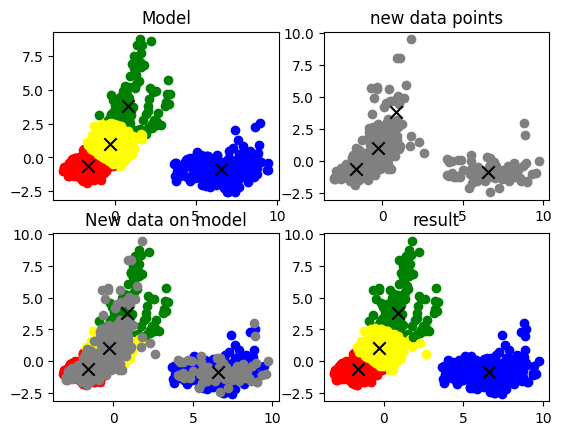

plotting model vs actual...


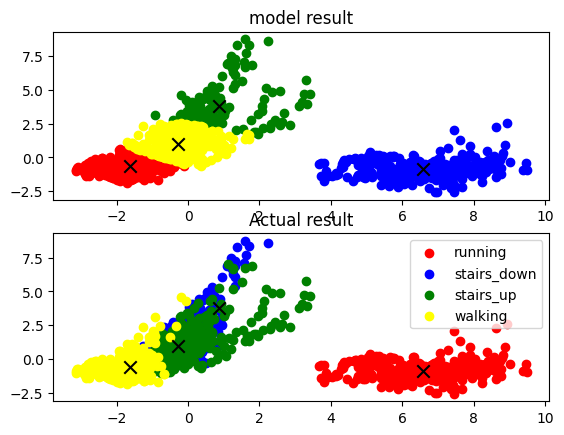

In [7]:
# ------ plot ------ #
# for i, data in enumerate(x):
#     print(f"{data[0]=}, {data[1]=}, {label[i]=}")
#     plt.scatter(data[0], data[1], label=label[i])

print("Plotting model and test data...")

fig, axs = plt.subplots(2, 2)

axs[0, 0].title.set_text('Model')
for l in u_labels:
    ii = np.where(label == l)
    axs[0, 0].scatter(x_train_pca[ii, 0], x_train_pca[ii, 1], c=cdict[l], label=ldict[l])
# axs[0, 0].scatter(df[:, 0], df[:, 1], c=label)

axs[0, 0].scatter(centroids[:,0] , centroids[:,1] , s = 80, c="black", marker='x')

# ------ prediction test data ------ #
# Make predictions on the test data

axs[0, 1].title.set_text('new data points')
axs[0, 1].scatter(df_test[:, :1], df_test[:, 1:], c='grey')
axs[0, 1].scatter(centroids[:,0] , centroids[:,1] , s = 80, c="black", marker='x')

# create second plot which show new points whichout prediction
axs[1, 0].title.set_text('New data on model')
for l in u_labels:
    ii = np.where(label == l)
    axs[1, 0].scatter(x_train_pca[ii, 0], x_train_pca[ii, 1], c=cdict[l], label=ldict[l])
axs[1, 0].scatter(df_test[:, :1], df_test[:, 1:], c='grey')
axs[1, 0].scatter(centroids[:,0] , centroids[:,1] , s = 80, c="black", marker='x')

# create third plot which show the predictions of the new points
axs[1, 1].title.set_text('result')
for l in u_labels:
    ii = np.where(label == l)
    axs[1, 1].scatter(x_train_pca[ii, 0], x_train_pca[ii, 1], c=cdict[l], label=ldict[l])
for l in u_labels:
    ii = np.where(pred == l)
    axs[1, 1].scatter(x_test_pca[ii, 0], x_test_pca[ii, 1], c=cdict[l])
axs[1, 1].scatter(centroids[:,0] , centroids[:,1] , s = 80, c="black", marker='x')
plt.show()

print("plotting model vs actual...")
fig, axs = plt.subplots(2)
axs[0].title.set_text('model result')
for l in u_labels:
    ii = np.where(label == l)
    axs[0].scatter(x_train_pca[ii, 0], x_train_pca[ii, 1], c=cdict[l], label=ldict[l])
axs[0].scatter(centroids[:,0] , centroids[:,1] , s = 80, c="black", marker='x')

axs[1].title.set_text('Actual result')
for l in u_labels:
    ii = np.where(y_train == l)
    axs[1].scatter(x_train_pca[ii, 0], x_train_pca[ii, 1], c=cdict[l], label=ldict[l])
axs[1].scatter(centroids[:,0] , centroids[:,1] , s = 80, c="black", marker='x')
axs[1].legend()
plt.show()

In [8]:
test

ID        label        time  acc_x_min  acc_x_max  acc_x_avg  \
1407  1407      running   55.621941   0.058323   3.299404   1.245860   
3159  3159      walking  305.382141   0.736567   0.244601   0.816506   
1926  1926      walking   61.236530   0.920040   0.450276   0.882801   
3173  3173      walking  308.274262   0.741048   0.284949   0.723553   
1345  1345      running   93.070900   0.229752   3.331327   1.605301   
...    ...          ...         ...        ...        ...        ...   
1025  1025  stairs_down   38.436680   0.866538   0.130984   0.634091   
802    802  stairs_down   38.972931   1.468218   0.498549   1.104895   
2775  2775      walking  226.055252   0.823775   0.522104   0.799463   
839    839  stairs_down   50.042507   1.355800   0.276858   1.004652   
817    817  stairs_down   45.627308   1.186986   0.361544   0.998879   

      acc_x_std  acc_x_AUC  acc_x_pk  acc_x_cn  ...  acc_y_cn  acc_y_pw  \
1407   3.332526   1.245860  1.599743  0.283523  ... -0.353458  1.701411   
3159  -0.094162   0.816506 -0.402767 -0.993217  ... -0.675283 -0.701473   
1926   0.164384   0.882801  0.595870 -0.993217  ... -0.993217 -0.702158   
3173  -0.034731   0.723553  0.595870 -0.675283  ... -0.675283 -0.701492   
1345   3.405439   1.605301  1.599459 -0.035208  ...  0.601713  1.528868   
...         ...        ...       ...       ...  ...       ...       ...   
1025  -0.383365   0.634091 -0.900983  0.284841  ... -1.308344  0.805772   
802   -0.499523   1.104895 -0.900885  2.197601  ...  0.922803  1.116514   
2775   0.051237   0.799463 -0.402767 -0.675283  ...  0.278522 -0.701507   
839   -0.507550   1.004652 -0.400282  1.879272  ... -0.351810  0.630752   
817   -0.371101   0.998879  0.600839 -0.033084  ... -0.033084  0.859603   

      acc_z_min  acc_z_max  acc_z_avg  acc_z_std  acc_z_AUC  acc_z_pk  \
1407  -0.019734   0.405882  -0.127478  -0.011412  -0.127478  0.099169   
3159   0.736940  -0.179052   0.299288  -0.561805   0.299288 -0.402767   
1926   0.772608  -0.061887   0.344917  -0.514779   0.344917  0.595870   
3173   0.794736  -0.033677   0.314101  -0.531216   0.314101  0.595870   
1345  -0.064552   0.183525   0.112654   0.180604   0.112654  0.099027   
...         ...        ...        ...        ...        ...       ...   
1025   0.687267   0.089306   0.371314  -0.422317   0.371314  0.600280   
802    0.064299  -0.446966  -0.189328  -0.632396  -0.189328  1.101192   
2775   0.364485  -0.204990   0.236028  -0.523135   0.236028 -0.402767   
839    0.207343  -0.152559  -0.214354  -0.524628  -0.214354  1.601961   
817    0.367567  -0.474234  -0.088014  -0.715229  -0.088014  0.600839   

      acc_z_cn  acc_z_pw  
1407  2.194467  0.310031  
3159  0.278522 -0.704246  
1926  0.278522 -0.703931  
3173  0.914392 -0.704062  
1345  2.512475  0.709925  
...        ...       ...  
1025  0.284841  0.037737  
802   3.472400 -0.198338  
2775  1.550262 -0.704041  
839   1.241820 -0.179194  
817   1.560546 -0.330064  

[658 rows x 27 columns]

In [9]:
model = KMeans(n_clusters=n_clusters)
model.fit(x_train)

KMeans(n_clusters=4)

In [15]:

x_test_walking = test[test["label"] == "walking"]
y_test_walking = le.transform(x_test_walking["label"])
x_test_walking = x_test_walking.drop(["label", "time", "ID"], axis=1)
print(x_test_walking)
print(y_test_walking)

      acc_x_min  acc_x_max  acc_x_avg  acc_x_std  acc_x_AUC  acc_x_pk  \
3159   0.736567   0.244601   0.816506  -0.094162   0.816506 -0.402767   
1926   0.920040   0.450276   0.882801   0.164384   0.882801  0.595870   
3173   0.741048   0.284949   0.723553  -0.034731   0.723553  0.595870   
2986   0.797631   0.478930   0.782008  -0.049274   0.782008 -0.402767   
2367   0.783532   0.312273   0.740343  -0.102376   0.740343 -0.402767   
...         ...        ...        ...        ...        ...       ...   
2222   0.916865   0.349295   0.842854  -0.098752   0.842854  0.096551   
2050   1.004353   0.413863   0.832376  -0.083437   0.832376 -0.402767   
2542   0.884466   0.330008   0.791603  -0.292460   0.791603 -0.402767   
2159   0.833112   0.324521   0.889967  -0.059893   0.889967 -0.402767   
2775   0.823775   0.522104   0.799463   0.051237   0.799463 -0.402767   

      acc_x_cn  acc_x_pw  acc_y_min  acc_y_max  ...  acc_y_cn  acc_y_pw  \
3159 -0.993217 -0.703074  -1.509927  -1.053903  

In [16]:
x_test_running = test[test["label"] == "running"]
y_test_running = le.transform(x_test_running["label"])
x_test_running = x_test_running.drop(["label", "time", "ID"], axis=1)
print(x_test_running)
print(y_test_running)

      acc_x_min  acc_x_max  acc_x_avg  acc_x_std  acc_x_AUC  acc_x_pk  \
1407   0.058323   3.299404   1.245860   3.332526   1.245860  1.599743   
1345   0.229752   3.331327   1.605301   3.405439   1.605301  1.599459   
1546  -0.451479   4.231396   1.678026   5.422400   1.678026  2.099571   
1242   0.194271   2.504417   1.643658   2.947726   1.643658  1.601001   
1509   0.131152   3.347733   1.348143   3.761273   1.348143  1.599459   
...         ...        ...        ...        ...        ...       ...   
1338  -0.467913   3.379656   1.726184   4.036011   1.726184  1.599459   
1352   0.417613   2.443008   1.297475   2.638956   1.297475  1.599459   
1480   0.264859   3.523312   1.379245   3.927180   1.379245  1.599459   
1196   0.035168   2.953786   1.707854   3.280732   1.707854  1.601001   
1190  -0.185934   3.307385   1.522636   3.855872   1.522636  1.601001   

      acc_x_cn  acc_x_pw  acc_y_min  acc_y_max  ...  acc_y_cn  acc_y_pw  \
1407  0.283523  2.974391  -0.148959   1.742240  

In [17]:
x_test_stairs_down = test[test["label"] == "stairs_down"]
y_test_stairs_down = le.transform(x_test_stairs_down["label"])
x_test_stairs_down = x_test_stairs_down.drop(["label", "time", "ID"], axis=1)
print(x_test_stairs_down)
print(y_test_stairs_down)

      acc_x_min  acc_x_max  acc_x_avg  acc_x_std  acc_x_AUC  acc_x_pk  \
945    0.824335   0.261561   0.778218  -0.232508   0.778218  0.099859   
857    1.020039   0.412311   0.891635  -0.446674   0.891635 -0.900843   
921    0.813504   0.229194   0.749406  -0.388963   0.749406 -0.900983   
1113   1.321439   0.753052   1.120465  -0.171300   1.120465 -0.400164   
1135   1.440954   0.510299   1.165126  -0.464392   1.165126 -0.400164   
...         ...        ...        ...        ...        ...       ...   
742    1.507807   0.526261   1.414163  -0.451119   1.414163 -0.900885   
1025   0.866538   0.130984   0.634091  -0.383365   0.634091 -0.900983   
802    1.468218   0.498549   1.104895  -0.499523   1.104895 -0.900885   
839    1.355800   0.276858   1.004652  -0.507550   1.004652 -0.400282   
817    1.186986   0.361544   0.998879  -0.371101   0.998879  0.600839   

      acc_x_cn  acc_x_pw  acc_y_min  acc_y_max  ...  acc_y_cn  acc_y_pw  \
945   0.922115  0.568342  -2.142979  -1.050190  

In [18]:
x_test_stairs_up = test[test["label"] == "stairs_up"]
y_test_stairs_up = le.transform(x_test_stairs_up["label"])
x_test_stairs_up = x_test_stairs_up.drop(["label", "time", "ID"], axis=1)
print(x_test_stairs_up)
print(y_test_stairs_up)

     acc_x_min  acc_x_max  acc_x_avg  acc_x_std  acc_x_AUC  acc_x_pk  \
239   1.476808   0.528478   1.420348  -0.422865   1.420348 -0.901003   
203   1.499590   0.729774   1.413938  -0.176728   1.413938  0.099799   
332   1.570552   0.740858   1.291735  -0.226829   1.291735 -0.400979   
134   1.575034   0.423839   1.218756  -0.464325   1.218756 -0.401022   
52    1.104073   0.751943   1.107412  -0.041929   1.107412  0.099859   
..         ...        ...        ...        ...        ...       ...   
108   1.331523   0.636442   1.199925  -0.186909   1.199925  0.599360   
318   1.495109   0.542666   1.274539  -0.227634   1.274539 -0.400979   
56    1.289320   0.447782   1.132788  -0.208346   1.132788 -0.400562   
468   1.290440   0.650852   1.290581  -0.120291   1.290581  0.099859   
535   0.395204   1.072288   1.266890   0.140413   1.266890 -0.900983   

     acc_x_cn  acc_x_pw  acc_y_min  acc_y_max  ...  acc_y_cn  acc_y_pw  \
239  0.284725  0.873266  -0.110490  -0.661342  ...  0.603350 

In [21]:
y_pred_walking = model.predict(x_test_walking)
print(y_pred_walking)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0]


In [22]:
y_pred_running = model.predict(x_test_running)
print(y_pred_running)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1]


In [23]:
y_pred_stairs_down = model.predict(x_test_stairs_down)
print(y_pred_stairs_down)

[3 2 2 2 3 3 2 3 3 2 3 3 3 2 2 2 3 2 2 3 2 3 3 2 3 3 2 2 3 2 3 2 2 2 3 3 2
 3 2 2 3 2 2 2 3 3 2 3 2 3 3 3 3 3 2 3 2 2 3 3 3 3 2 3 3 2 3 3 3 3 3 2 3 3
 3 3 3 3 3 3 2 3 3 3 3 3 2 3 3 3 3 3 3 2 3 2 3 2 3 3 3 2 3 3 3 3 3 3 3 3 3
 2 3 3 3 3 3 2 3 2 3 2 2 3]


In [24]:
y_pred_stairs_up = model.predict(x_test_stairs_up)
print(y_pred_stairs_up)

[3 2 3 3 3 3 2 3 3 3 3 2 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 0 2 3 3 3 3 3 2 3 3
 3 3 3 3 2 2 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 3 3 2 3 2 0 2 3
 3 2 2 3 2 3 3 3 3 3 2 3 3 2 2 3 3 3 3 3 3 3 2 3 3 3 2 3 2 2 3 0 2 3 2 2 3
 3 3 3 3 3 3 3 3 3 2 3 3 3 2 3 3 3 3 3 3]


In [30]:
unique, counts = np.unique(y_pred_walking, return_counts=True)

count_dict_walking = dict(zip(unique, counts))
print("walking")
print(count_dict_walking)

walking
{0: 312, 2: 6}


In [31]:
unique, counts = np.unique(y_pred_running, return_counts=True)

count_dict_running = dict(zip(unique, counts))
print("running")
print(count_dict_running)

running
{1: 85}


In [32]:
unique, counts = np.unique(y_pred_stairs_up, return_counts=True)

count_dict_stairs_up = dict(zip(unique, counts))
print("stairs_up")
print(count_dict_stairs_up)

stairs_up
{0: 3, 2: 30, 3: 98}


In [33]:
unique, counts = np.unique(y_pred_stairs_down, return_counts=True)

count_dict_stairs_down = dict(zip(unique, counts))
print("stairs_down")
print(count_dict_stairs_down)

stairs_down
{2: 43, 3: 81}


In [34]:
transform_dict = {0: "walking", 1: "running", 3: "stairs_up", 2: "stairs_down"}

In [37]:
walking_acc = count_dict_walking[0] / (count_dict_walking[0] + count_dict_walking[2])
print("walking_acc")
print(walking_acc)

walking_acc
0.9811320754716981


In [40]:
running_acc = count_dict_running[1] / (count_dict_running[1])
print("running_acc")
print(running_acc)

running_acc
1.0


In [50]:
stairs_up_acc = count_dict_stairs_up[3] / (count_dict_stairs_up[2] + count_dict_stairs_up[0] + count_dict_stairs_up[3])
print("stairs_up_acc")
print(stairs_up_acc)

stairs_up_acc
0.7480916030534351


In [51]:
stairs_down_acc = count_dict_stairs_down[2] / (count_dict_stairs_down[3] + count_dict_stairs_down[2])
print("stairs_down_acc")
print(stairs_down_acc)

stairs_down_acc
0.3467741935483871


In [53]:
print("Accuracy of kmeans with walking dataset:")
print((walking_acc * len(y_pred_walking) + running_acc * len(y_pred_running) + stairs_up_acc * len(y_pred_stairs_up) + stairs_down_acc * len(y_pred_stairs_down)) / (len(y_pred_walking) + len(y_pred_running) + len(y_pred_stairs_up) + len(y_pred_stairs_down)))

Accuracy of kmeans with walking dataset:
0.817629179331307
